In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [5]:
%ls datasets

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [6]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
df=pd.read_csv('datasets/antropometria-dataset.csv')
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,emb,temb,cintura,cadera,sistol,diastol,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,4,,98.7,106.0,63.25,53.25,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,,,64.0,75.0,70.00,50.00,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,4,,67.6,94.3,70.50,41.00,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,,,60.6,72.2,71.00,64.00,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,4,,113.0,127.0,72.00,53.50,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


In [7]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [8]:
df["sexo"]=df["sexo"].apply(str)

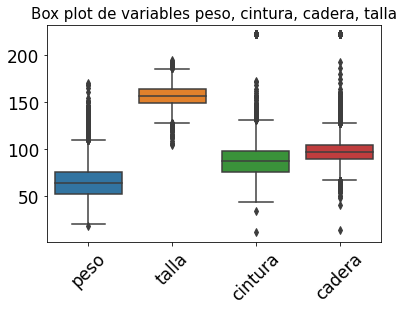

In [9]:
sns.boxplot(data=df.loc[:,['peso', 'talla', 'cintura','cadera']])
#plt.rcParams('figure.figsize')=[20,10]
plt.xticks(rotation = 45, fontsize = 17)
plt.yticks(fontsize = 17)
plt.title('Box plot de variables peso, cintura, cadera, talla', fontsize = 15)
plt.show()

In [11]:
sns.histplot(df.peso)
.plot(figsize=(20,10))
plt.show()

SyntaxError: invalid syntax (443527430.py, line 2)

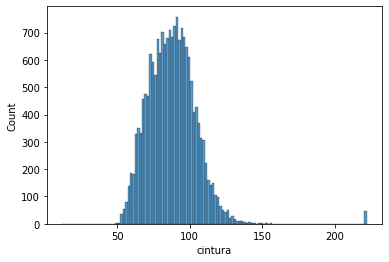

In [12]:
sns.histplot(df.cintura)
plt.show()

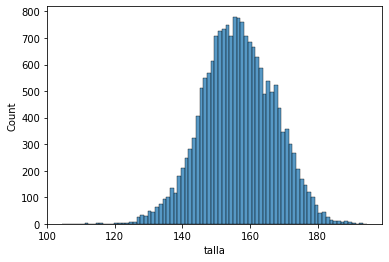

In [13]:
sns.histplot(df.talla)
plt.show()

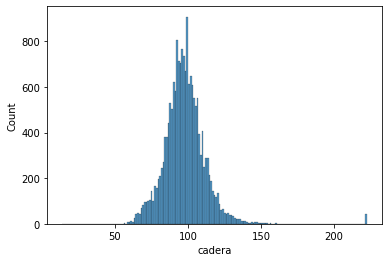

In [14]:
sns.histplot(df.cadera)
plt.show()

Text(0.5, 1.0, 'Peso')

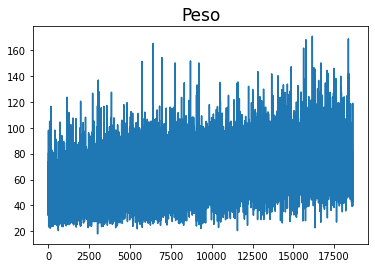

In [15]:
df['peso'].plot(kind = 'line')
plt.title('Peso', fontsize = 17)

Text(0.5, 1.0, 'Cadera')

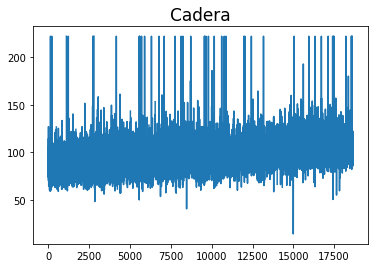

In [16]:
df['cadera'].plot(kind = 'line')
plt.title('Cadera', fontsize = 17)

Text(0.5, 1.0, 'Talla')

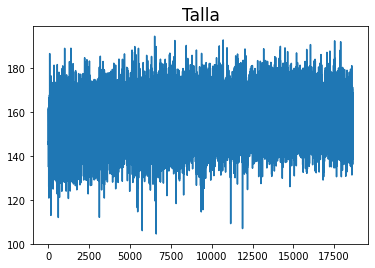

In [17]:
df['talla'].plot(kind = 'line')
plt.title('Talla', fontsize = 17)

Text(0.5, 1.0, 'Cintura')

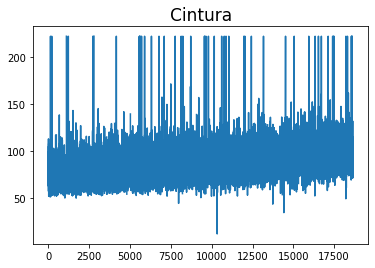

In [18]:
df['cintura'].plot(kind = 'line')
plt.title('Cintura', fontsize = 17)

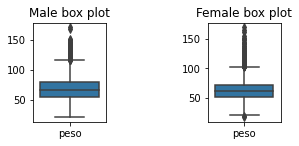

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(2,4,1) # rows, columns, position
sns.boxplot(data = df.loc[df['sexo']=='1',['peso']])
                          
ax2 = fig.add_subplot(2,4,3)
sns.boxplot(data = df.loc[df['sexo']=='2',['peso']])

ax1.title.set_text('Male box plot')
ax2.title.set_text('Female box plot')

plt.show()  

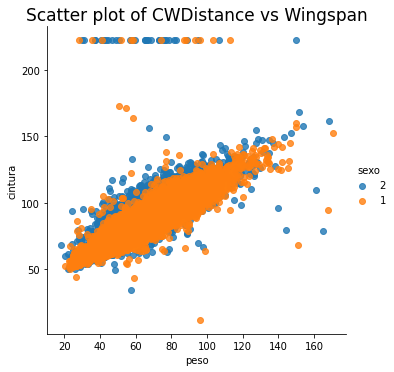

In [20]:
sns.lmplot(x = 'peso',
          y = 'cintura',
          data = df,
          fit_reg = False,
          hue = 'sexo')
plt.title('Scatter plot of CWDistance vs Wingspan', fontsize = 17)
plt.show()

In [21]:
df.corr()

,folio,intp,entidad,edad,meses,peso,ropa,talla,cintura,cadera,sistol,diastol,PrimaryLast,est_dis,est_urb,est_marg,pondef,est_var
folio,1.000000,-0.017127,0.999979,0.026894,0.014225,-0.044368,0.011953,-0.071853,-0.026543,-0.032166,0.003985,-0.018598,NaN,-0.094484,-0.107161,0.002257,0.010347,0.999845
intp,-0.017127,1.000000,-0.017200,-0.636936,-0.006015,-0.374168,-0.007191,-0.144495,-0.421887,-0.321075,-0.340492,-0.278265,NaN,-0.006402,-0.000918,0.016604,0.042477,-0.017334
entidad,0.999979,-0.017200,1.000000,0.027015,0.014288,-0.044406,0.011915,-0.071862,-0.026583,-0.032198,0.004068,-0.018564,NaN,-0.094805,-0.107293,0.001842,0.010179,0.999861
edad,0.026894,-0.636936,0.027015,1.000000,0.003416,0.317050,0.018021,0.021070,0.478879,0.340062,0.535218,0.345657,NaN,-0.035563,-0.019963,-0.027559,0.037230,0.026532
meses,0.014225,-0.006015,0.014288,0.003416,1.000000,-0.004255,0.003584,0.008326,0.000214,0.000300,0.009473,-0.004480,NaN,0.001648,0.000554,-0.001311,0.015791,0.014309
peso,-0.044368,-0.374168,-0.044406,0.317050,-0.004255,1.000000,0.006378,0.556587,0.791677,0.777061,0.353440,0.358054,NaN,0.087096,0.112852,-0.106389,0.085659,-0.042902
ropa,0.011953,-0.007191,0.011915,0.018021,0.003584,0.006378,1.000000,-0.005135,0.007701,0.003628,0.055130,-0.012078,NaN,-0.024589,-0.037460,0.015826,-0.050711,0.011431
talla,-0.071853,-0.144495,-0.071862,0.021070,0.008326,0.556587,-0.005135,1.000000,0.245208,0.273173,0.142837,0.152398,NaN,0.085241,0.109504,-0.096508,0.097229,-0.070432
cintura,-0.026543,-0.421887,-0.026583,0.478879,0.000214,0.791677,0.007701,0.245208,1.000000,0.863396,0.403265,0.362961,NaN,0.049018,0.071307,-0.067250,0.062563,-0.025732
cadera,-0.032166,-0.321075,-0.032198,0.340062,0.000300,0.777061,0.003628,0.273173,0.863396,1.000000,0.307012,0.296613,NaN,0.072143,0.103383,-0.099546,0.065710,-0.030944


In [22]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [23]:
df.dropna(inplace=True)
#df

In [24]:
y=pd.DataFrame(df['peso'])
x=pd.DataFrame(df['cintura'])

lm=linear_model.LinearRegression()
model_lm=lm.fit(x,y)
model_lm

LinearRegression()

In [25]:
print('The y intercept, b0= ', model_lm.intercept_)
print('The coeff. of cintura, b1= ', model_lm.coef_)
print('The R^2 values is= ', model_lm.score(x,y))

The y intercept, b0=  [-8.31365631]
The coeff. of cintura, b1=  [[0.83156762]]
The R^2 values is=  0.626752266114085


In [26]:
modelA=sm.OLS.from_formula('peso~cintura',data=df)
resultA=modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:56:12   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
cintura        0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#peso = b0+b1*cintura
#peso of a person with cintura=98.7?
#peso=-8.3137+0.8316*(98.7)

In [28]:
peso=-8.3137+0.8316*98.7
print('Predicted peso of a person with cintura 98.7 is ',peso)

Predicted peso of a person with cintura 98.7 is  73.76522


In [29]:
RESI_A=resultA.resid
RESI_A

0        -0.062068
1        -9.256672
2         6.899685
3        -8.679342
4        12.296515
           ...    
18635     6.777867
18636    -7.979387
18637    -4.268694
18638   -15.751528
18639    -1.620382
Length: 18032, dtype: float64

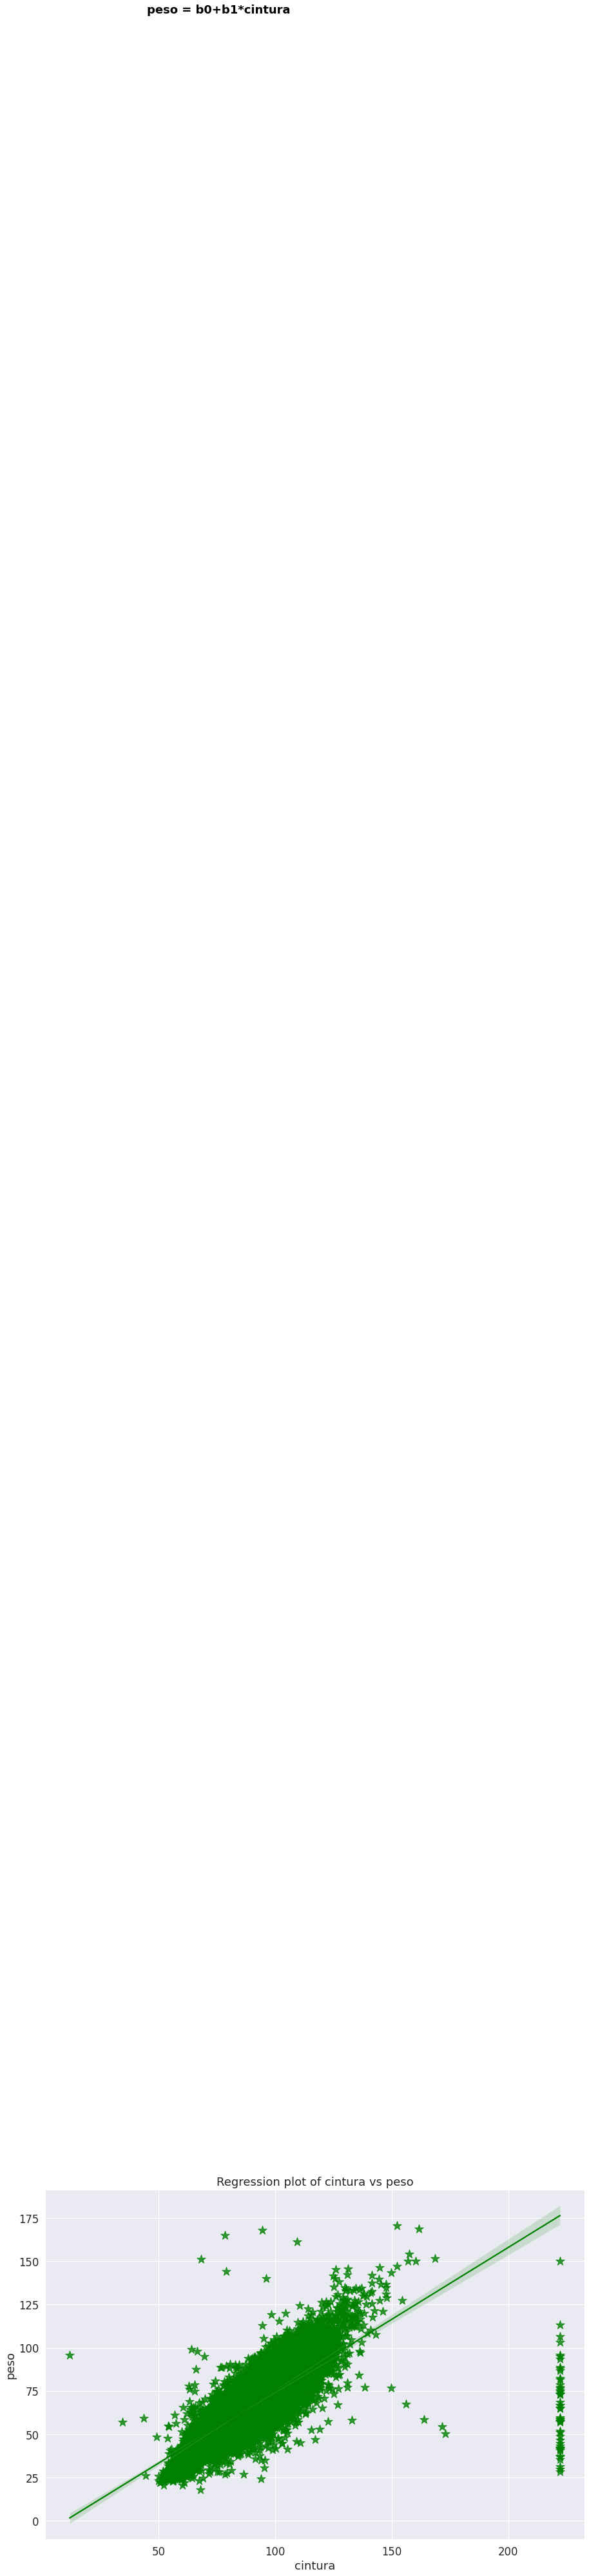

In [30]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
ax=sns.regplot(x='cintura',
               y='peso',
               data=df,
               color='green',
               marker='*',
               scatter_kws={'s':200}
              )

ax.set(xlabel='cintura',
       ylabel='peso')

ax.text(45,1450,'peso = b0+b1*cintura',
        horizontalalignment='left',size='medium',color='black',
        weight='semibold')

ax.set_title('Regression plot of cintura vs peso')
plt.show()


In [31]:
modelA=sm.OLS.from_formula('peso~cintura+sexo',data=df)
resultA=modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                 1.641e+04
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:56:36   Log-Likelihood:                -68158.
No. Observations:               18032   AIC:                         1.363e+05
Df Residuals:                   18029   BIC:                         1.363e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8191      0.424    -13.718      0.000      -6.651      -4.988
sexo[T.2]     -4.8943      0.159    -30.851      0.000      -5.205      -4.583
cintura        0.8337      0.005    178.965      0.000       0.825       0.843
==============================================================================
Omnibus:                    13472.230   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1218552.370
Skew:                          -2.901   Prob(JB):                         0.00
Kurtosis:                      42.852   Cond. No.                         482.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#peso = b0+b1*cintura+b2sexo
#peso = b0+b1*cintura+b2(s_1+s_2)
#peso=-5.8191+0.8337(98.7)-4.8943sexo[T.2]

In [33]:
print('The peso of sexo 2 with cintura 98.7 is= ',-5.8191+0.8337*98.7-4.8943*1)
print('The peso of sexo 1 with cintura 98.7 is= ',-5.8191+0.8337*98.7-4.8943*0)

The peso of sexo 2 with cintura 98.7 is=  71.57279
The peso of sexo 1 with cintura 98.7 is=  76.46709
